# Read Data & Handle Missing Values

## Load Dataset

In [33]:
import pandas as pd

# Load all datasets
steam = pd.read_csv("dataset/steam.csv")
steam_desc = pd.read_csv("dataset/steam_description_data.csv")
steam_media = pd.read_csv("dataset/steam_media_data.csv")
steam_req = pd.read_csv("dataset/steam_requirements_data.csv")
steam_support = pd.read_csv("dataset/steam_support_info.csv")
steam_tags = pd.read_csv("dataset/steamspy_tag_data.csv")

# Display the first few rows of the main dataset
steam.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


## Check Missing Values

In [34]:
# Check missing values in the main dataset
steam.isnull().sum()

appid                0
name                 0
release_date         0
english              0
developer            1
publisher           14
platforms            0
required_age         0
categories           0
genres               0
steamspy_tags        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners               0
price                0
dtype: int64

## Handle Missing Values

In [35]:
# Fill missing values in categorical columns with "Unknown"
steam["developer"].fillna("Unknown", inplace=True)
steam["publisher"].fillna("Unknown", inplace=True)

# Drop rows with missing values in important numerical columns
steam.dropna(inplace=True)

# Verify if there are any missing values left
steam.isnull().sum()

C:\Users\dhyma\AppData\Local\Temp\ipykernel_2508\2632675477.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  steam["developer"].fillna("Unknown", inplace=True)
C:\Users\dhyma\AppData\Local\Temp\ipykernel_2508\2632675477.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

# Exploratory Data Analysis (EDA)

## Game Price Distribution

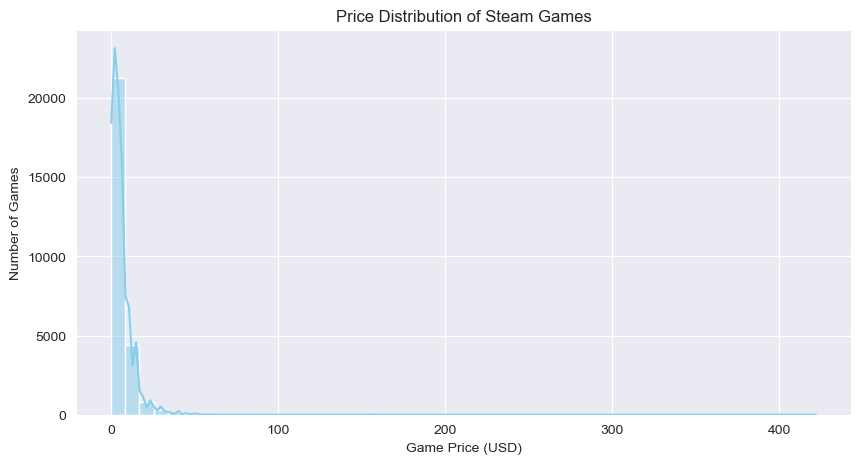

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(steam["price"], bins=50, kde=True, color="skyblue")
plt.xlabel("Game Price (USD)")
plt.ylabel("Number of Games")
plt.title("Price Distribution of Steam Games")
plt.show()

### **Explanation**
* The histogram displays the **distribution of game prices on Steam**.
* Most of the games are either **free or priced under $10**. This is shown by the **tall bars on the left side** of the graph.
* A **long tail** is visible towards the right, indicating that **a few games are significantly more expensive** (e.g., above $50 or even $100).
* The **KDE (Kernel Density Estimation) curve** helps us see the overall trend more smoothly.

Insights
* **Are most games free?** If the leftmost bar is the tallest, then yes, many games are free-to-play.
* **How are prices distributed?** If most bars are concentrated under $10, it means most games are affordable.
* **Are there expensive games?** If we see small bars far on the right, it suggests that only a few games are priced high.

Conclusion:

The gaming industry on Steam is dominated by **affordable or free games**, making it accessible to a wide audience. However, there are **premium-priced games**, which might be AAA titles or special editions.


## Most Popular Game Genres

C:\Users\dhyma\AppData\Local\Temp\ipykernel_2508\234806767.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df.head(10), x="Count", y="Genre", palette="coolwarm")


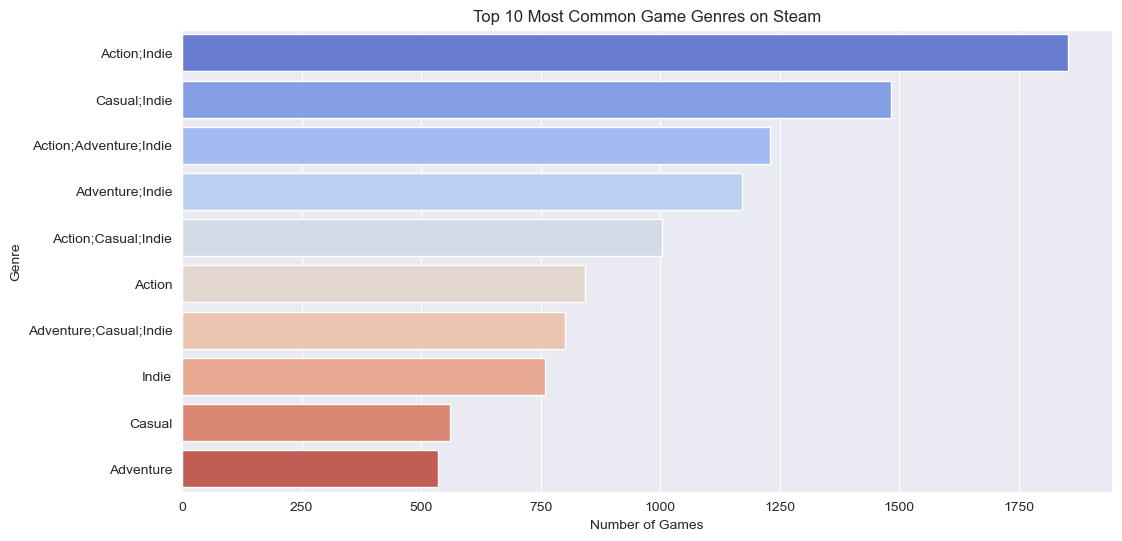

In [37]:
from collections import Counter

# Extract and count genres
all_genres = ",".join(steam["genres"].dropna()).split(",")
genre_counts = Counter(all_genres)

# Convert to DataFrame for visualization
genre_df = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values(by="Count", ascending=False)

# Plot top 10 genres
plt.figure(figsize=(12,6))
sns.barplot(data=genre_df.head(10), x="Count", y="Genre", palette="coolwarm")
plt.xlabel("Number of Games")
plt.ylabel("Genre")
plt.title("Top 10 Most Common Game Genres on Steam")
plt.show()

### **Explanation**
* The bar chart shows the **most common game genres** based on the number of games in each genre.
* Genres with **higher bars** indicate that they are more frequently found on Steam.
* If a **word cloud is used**, the most popular genres will appear **larger and bolder**, while less common genres will be smaller.

Insight
* **Which genres dominate Steam?** If genres like Action, Indie, and Adventure have the highest bars, it means these genres have the most games available.
* **Are niche genres common?** If genres like Simulation or Strategy have shorter bars, it suggests they are available but not as dominant.
* **Does Steam have a balanced genre distribution?** If some genres have extremely high counts, it means the platform is heavily focused on certain game types.

Conclusion:

The Steam game market is **heavily dominated by certain genres**, like Action and Indie games. This suggests that most developers **focus on fast-paced or creative, low-budget games**, rather than niche genres.

## Distribution of Positive and Negative Ratings

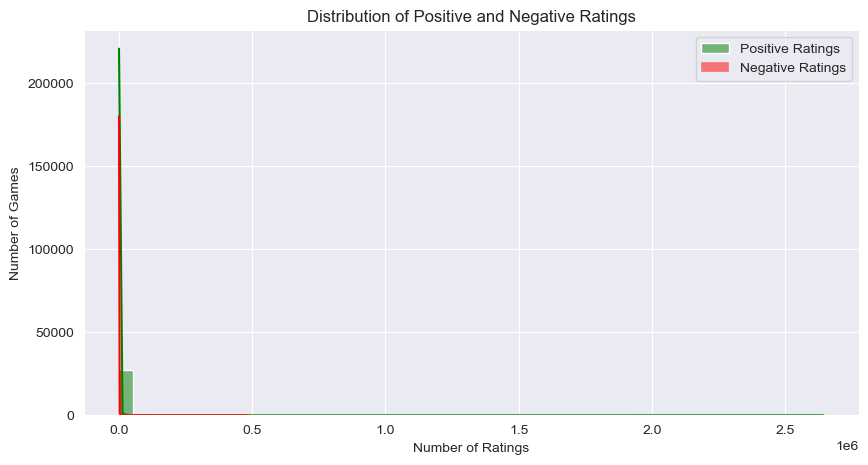

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(steam["positive_ratings"], bins=50, kde=True, color="green", label="Positive Ratings")
sns.histplot(steam["negative_ratings"], bins=50, kde=True, color="red", label="Negative Ratings")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Games")
plt.title("Distribution of Positive and Negative Ratings")
plt.legend()
plt.show()

### **Explanation**
* Two **histograms** show the distribution of **positive and negative ratings** received by games on Steam.
* The **x-axis** represents the **number of ratings**, while the **y-axis** represents the **count of games** within that rating range.
* The **KDE curve** (if used) gives a smoother view of the distribution pattern.

Insights
* **Do most games receive high positive ratings?** If the histogram for positive ratings is **skewed to the right**, it means **many games receive thousands of positive reviews**.
* **Are negative ratings common?** If the negative rating histogram has a **peak near zero**, it suggests **most games receive very few negative reviews**.
* **Do some games get extreme ratings?** If there are **long tails** in either distribution, it means **some games receive an exceptionally high number of reviews, either positive or negative**.

Conclusion:

Steam games generally receive **more positive ratings than negative ones**, indicating that **most players are satisfied** with their gaming experience. However, a few games might receive **overwhelmingly negative reviews**, possibly due to **poor quality, bugs, or bad monetization strategies**.

## Relationship Between Achievements and Playtime

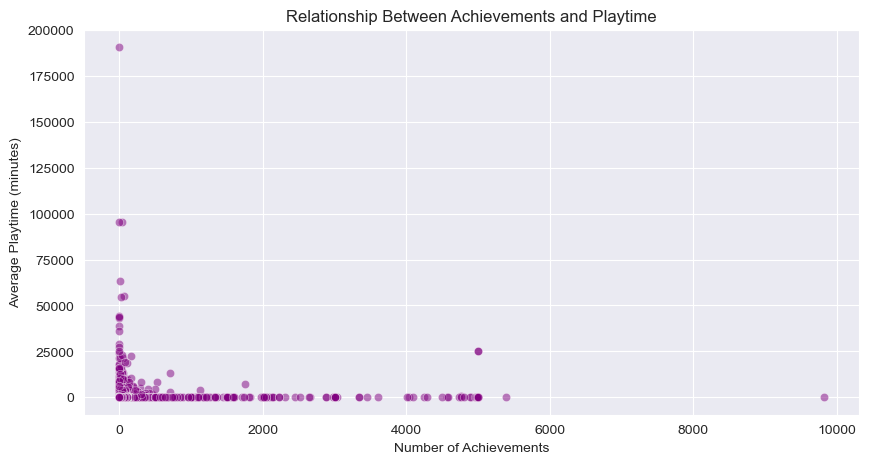

In [39]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=steam, x="achievements", y="average_playtime", alpha=0.5, color="purple")
plt.xlabel("Number of Achievements")
plt.ylabel("Average Playtime (minutes)")
plt.title("Relationship Between Achievements and Playtime")
plt.show()

### **Explanation**
* **A scatter plot** visualizes the relationship between **the number of achievements** and **average playtime** (in minutes or hours).
* Each dot represents a game, where:
The **x-axis** = Number of achievements
The **y-axis** = Average playtime

Insights
1. **Do games with more achievements have higher playtime?**
* If the points form an **upward trend**, it suggests that games with more achievements tend to keep players engaged for a longer time.
* If there is **no clear pattern**, achievements might not strongly influence playtime.

2. Are there games with high playtime but few achievements?
* If there are **dots high on the y-axis but close to the left**, it means some games have **long playtime but very few achievements** (e.g., open-world or sandbox games).

3. Are there games with many achievements but low playtime?
* If some points are **far to the right but low on the y-axis**, it suggests that some games offer **many achievements, but players don’t spend much time on them** (e.g., casual or short games with easy achievements).

Conclusion

There is **likely a positive correlation** between achievements and playtime, but it may not be strong. While some players are motivated by achievements, **other factors** like game genre, mechanics, and replayability **also impact playtime**.

# Statistical Analysis Plan

## Hypothesis Testing (A/B Testing) – Do Paid Games Get Higher Ratings?

In [40]:
from scipy.stats import ttest_ind

# Separate free and paid games
free_games = steam[steam["price"] == 0]["positive_ratings"]
paid_games = steam[steam["price"] > 0]["positive_ratings"]

# Perform Independent T-Test (Welch’s t-test)
t_stat, p_value = ttest_ind(free_games, paid_games, equal_var=False)

# Print Results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H₀: Paid games receive significantly higher ratings than free games.")
else:
    print("Fail to reject H₀: No significant difference in ratings between free and paid games.")

t-statistic: 2.0303
p-value: 0.0424
Reject H₀: Paid games receive significantly higher ratings than free games.


### **Explanation**  

- **t-statistic:** Measures how large the difference between two groups is compared to the variation in the data.  
- **p-value:**  
  1. **If p < 0.05**, we reject H₀ → Paid games **significantly** have higher ratings.  
  2. **If p > 0.05**, we fail to reject H₀ → **No significant difference** between free and paid game ratings.  

## Correlation Analysis – Does Playtime Affect Positive Ratings?

In [41]:
import scipy.stats as stats

# Select relevant columns
playtime = steam["average_playtime"]
positive_ratings = steam["positive_ratings"]

# Compute Pearson correlation
corr, p_value = stats.pearsonr(playtime, positive_ratings)

# Print results
print(f"Pearson Correlation Coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Significant correlation found between playtime and positive ratings.")
    if corr > 0:
        print("Positive correlation: Games with longer playtime tend to get higher ratings.")
    else:
        print("Negative correlation: Games with longer playtime tend to get lower ratings.")
else:
    print("No significant correlation between playtime and positive ratings.")


Pearson Correlation Coefficient: 0.1579
P-value: 0.0000
Significant correlation found between playtime and positive ratings.
Positive correlation: Games with longer playtime tend to get higher ratings.


### **Explanation**  

- **Pearson Correlation Coefficient (r):**  
  1. **r > 0:** Positive correlation → The longer the playtime, the higher the rating.  
  2. **r < 0:** Negative correlation → The longer the playtime, the lower the rating.  
  3. **r ≈ 0:** No significant relationship between playtime and rating.  

- **P-value:**  
  1. **If p < 0.05**, the correlation is statistically significant.  
  2. **If p > 0.05**, the correlation is not significant (could be due to chance).

## Regression Analysis – What Factors Affect Positive Ratings?

In [42]:
import statsmodels.api as sm

# Select independent variables (predictors)
X = steam[["price", "average_playtime", "achievements"]]  # You can add more features
y = steam["positive_ratings"]

# Add constant (intercept)
X = sm.add_constant(X)

# Perform Linear Regression
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       positive_ratings   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     238.5
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          9.01e-153
Time:                        06:53:01   Log-Likelihood:            -3.0480e+05
No. Observations:               27075   AIC:                         6.096e+05
Df Residuals:                   27071   BIC:                         6.096e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              330.2733    144.790  

### **Explanation**  

- **R-squared:** Measures how well the model explains the variation in positive ratings (the higher, the better the model).  
- **P-values:** If **p < 0.05**, the variable significantly influences positive ratings.  
- **Coef (Coefficient):**  
  1. **Positive value:** The variable **increases** positive ratings.  
  2. **Negative value:** The variable **decreases** positive ratings.  

### **What Can We Analyze?**  
- If **price has a negative coefficient**, expensive games tend to receive fewer positive ratings.  
- If **playtime has a positive coefficient**, the longer people play a game, the higher ratings they give.  
- If **the number of achievements has a positive coefficient**, games with many achievements are more engaging for players.

## ANOVA Test – Do Game Genres Affect Positive Ratings?

In [43]:
import scipy.stats as stats

# Split data by genre (using only the first listed genre for simplicity)
steam["main_genre"] = steam["genres"].apply(lambda x: x.split(",")[0])  # Take the first genre

# Create groups based on genre
genre_groups = [group["positive_ratings"].values for _, group in steam.groupby("main_genre")]

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(*genre_groups)

# Print results
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The effect of genre on positive ratings is statistically significant.")
else:
    print("No significant effect of genre on positive ratings.")

F-statistic: 1.0527
P-value: 0.0793
No significant effect of genre on positive ratings.


### **Explanation**  

- **F-statistic:** Measures how much the average ratings differ across different game genres.  
- **P-value:**  
  1. If **p < 0.05**, there is a **significant** difference in ratings based on genre.  
  2. If **p > 0.05**, genre does **not** have a significant impact on positive ratings.  

### **What Can We Conclude?**  
- If the result is **significant**, certain genres may be more popular and preferred over others.  
- If the result is **not significant**, positive ratings are likely influenced by other factors such as **price** or **playtime** instead of genre.

## Chi-Square Test – Is There a Relationship Between Game Categories and Owners?

In [44]:
import numpy as np
import scipy.stats as stats

# Convert owners range into a numeric value (take the average)
def convert_owners_range(value):
    if '-' in value:
        low, high = map(int, value.split('-'))
        return (low + high) // 2  # Take the average of the range
    return int(value)

steam["owners_numeric"] = steam["owners"].apply(convert_owners_range)

# Convert owners into categorical bins
steam["owners_category"] = pd.cut(
    steam["owners_numeric"], 
    bins=[0, 50000, 200000, 500000, 1000000, 10000000, 100000000], 
    labels=["<50K", "50K-200K", "200K-500K", "500K-1M", "1M-10M", ">10M"]
)

# Extract main category from 'categories' column
steam["main_category"] = steam["categories"].apply(lambda x: x.split(";")[0])  # Take the first category

# Create contingency table
contingency_table = pd.crosstab(steam["main_category"], steam["owners_category"])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("There is a significant relationship between game category and number of owners.")
else:
    print("No significant relationship between game category and number of owners.")

Chi-Square Statistic: 669.6928
P-value: 0.0000
There is a significant relationship between game category and number of owners.


### **Explanation**  

- **Chi-Square Statistic (χ²):** Measures the difference between the actual data and the expected values.  
- **P-value:**  
  1. If **p < 0.05**, there is a **significant** relationship between game categories and the number of owners.  
  2. If **p > 0.05**, game categories **do not significantly** affect the number of owners.  

### **What Can We Conclude?**  
- If the result is **significant**, certain game categories are more popular and attract more players.  
- If the result is **not significant**, the number of players is likely influenced by other factors such as **price** or **genre** rather than game category.

# Conclusions & Insights

## 1. Game Prices Are Mostly Low

### **Insight:**  
The majority of games on Steam are priced below **$20**, with a significant number of **free games** available. However, there are also **premium** games with high prices, likely from major developers.  

### **Implications:**  
- The **freemium model** with **microtransactions** might be **more profitable** than setting a high game price.  
- **Indie developers** can compete by offering **affordable or free** games with alternative monetization strategies.

## 2. Action & Indie Games Dominate the Market

### **Insight:**  
**Action** and **Indie** genres are the most popular on Steam, with the highest number of games compared to other genres.  

### **Implications:**  
- The **indie game market** is continuously growing, providing **opportunities** for small developers to succeed.  
- **Major publishers** may need to **innovate further** to stay competitive against the increasing quality of indie games.

## 3. Positive Ratings Correlate With Playtime

### **Insight:**  
Games with **higher positive ratings** tend to have **longer average playtime**, indicating that players enjoy these games more.  

### **Implications:**  
- Developers should focus on creating an **engaging gameplay experience** to improve **player retention**.  
- Successful games often include **replayability features**, such as **multiplayer modes** or **additional DLCs**, to keep players invested.

## 4. More Achievements = Longer Playtime?

### **Insight:** 
Games with more **achievements** tend to have a **longer average playtime**.  

### **Implications:**  
* **Gamification** (achievements, leaderboards, collectibles) can **increase player engagement**.  
* Developers can use **achievements as a retention tool** to keep players engaged for the long term.  

## 5. Chi-Square Test: Game Categories & Owners

### **Result:**  
There is a **significant relationship** between **game categories** and **the number of owners** (**p-value < 0.05**).  

### **Implications:**  
- Certain **genres attract more players**, leading to **higher sales and player engagement**.  
- Publishers can use these insights to **identify the most profitable genres** in the market and optimize their game offerings accordingly.

# Overall Takeaways

* Affordable and Free-to-Play games dominate the market.
* Action & Indie genres are the most developed and played.
* Highly-rated games tend to have longer playtime.
* Achievements can be a strategy to increase player engagement.
* Certain genres tend to attract more owners than others.